# PART A

## A1

First, we will start by installing and importing the necessary libraries:

In [3]:
%pip install numpy
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Let's add the data for each class, where D1 refers to the training samples for class $\omega_1$ and D2 for class $\omega_2$  

In [4]:
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

The probability density function of x for both classes is given as $p(x| \theta) = \frac{1}{\pi (1 + (x - \theta)^2)}$

In [5]:
def pdf (x, theta):
    return 1 / (np.pi * (1 + (x - theta)**2))

The likelihood is given as $p(D|\theta) = \prod p(x_n|\theta)$ but since the logarithm is a monotonically increasing function, we will use the log-likelihood which is given as $l(\theta) = \log(p(D|\theta))$

In [6]:
def log_likelihood (D, theta):
    return np.sum(np.log(pdf(D, theta)))

### Finding $\hat{\theta}$

In order to find the $\hat{\theta}$ value that maximizes the log-likelihood (and the likelihood), we will pass a large range of theta values and return the one that maximizes the log-likelihood. We follow this approach since calculating the gradient of the log-likelihood is computationally difficult.

In [7]:
def fit (D, theta_values):
    likelihood_values = np.array([log_likelihood(D, theta) for theta in theta_values])
    return theta_values[np.argmax(likelihood_values)]

We select a range of theta values that will likely maximize the log-likelihood. Since our data (D1, D2) range from $[-4.5, 4.1]$, we are going to select a slightly bigger range $[-6, 6]$ to make sure that the theta value that maximizes the log-likelihood is included.

In [8]:
theta_values = np.linspace(-6, 6, 1000)
theta_hat_1 = fit(D1, theta_values)
theta_hat_2 = fit(D2, theta_values)

### Plotting $\log p(D|\theta)$ and $\hat{\theta}$

Now we can plot the log-likelihood for each class and for different $\theta$ values, as well as the $\hat{\theta}_1$ and $\hat{\theta}_2$ values that maximizes the log-likelihoods.

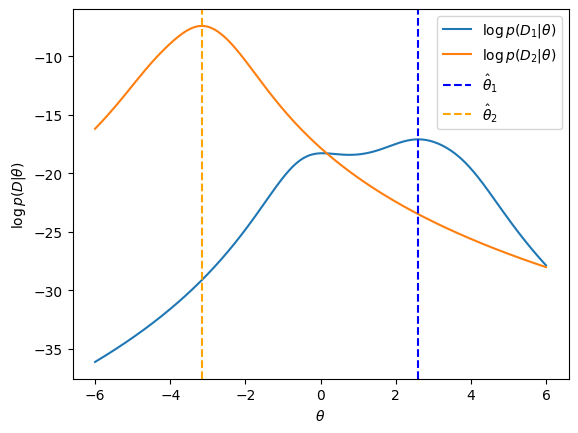

In [9]:
plt.plot(theta_values, [log_likelihood(D1, theta) for theta in theta_values], label=r'$\log p(D_1|\theta)$')
plt.plot(theta_values, [log_likelihood(D2, theta) for theta in theta_values], label=r'$\log p(D_2|\theta)$')
plt.axvline(theta_hat_1, color='blue', linestyle='--', label=r'$\hat{\theta}_1$')
plt.axvline(theta_hat_2, color='orange', linestyle='--', label=r'$\hat{\theta}_2$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\log p(D|\theta)$')
plt.legend()
plt.show()

## Α2

We will first calculate the a-priori probabilities for each class. We have 7 samples in class $\omega_1$ and 5 samples in class $\omega_2$ (12 total), so the a-priori probabilities are calculated as:

In [10]:
apriori_P1 = len(D1) / (len(D1) + len(D2))
apriori_P2 = len(D2) / (len(D1) + len(D2))

We can now define the discriminant function as: $$g(x) = \log{P(x|\hat{\theta}_1}) - \log{P(x|\hat{\theta}_2}) + \log(P(\omega_1)) - \log(P(\omega_2))$$

In [11]:
def predict (D, apriori_P1, apriori_P2, theta1, theta2):
    return np.log(pdf(D, theta1)) - np.log(pdf(D, theta2)) + np.log(apriori_P1) - np.log(apriori_P2)

We can now calculate all of the $g$ values and plot them. The decision boundary is $g(x) = 0$ 

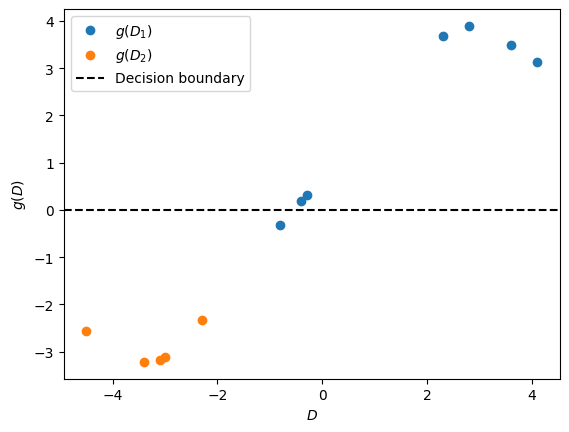

In [12]:
g_values_D1 = predict(D1, apriori_P1, apriori_P2, theta_hat_1, theta_hat_2)
g_values_D2 = predict(D2, apriori_P1, apriori_P2, theta_hat_1, theta_hat_2)

plt.plot(D1, g_values_D1, 'o', label=r'$g(D_1)$')
plt.plot(D2, g_values_D2, 'o', label=r'$g(D_2)$')
plt.axhline(0, color='black', linestyle='--', label='Decision boundary')
plt.xlabel(r'$D$')
plt.ylabel(r'$g(D)$')
plt.legend()
plt.show()

### Observations and conclusions

For the classification to be correct we need to:
- Assign $x$ in class $\omega_1$ (no stress) if $g(x) > 0$
- Assign $x$ in class $\omega_2$ (stress) if $g(x) < 0$

while the decision boundary is $g(x) = 0$.

We can clearly see that the classification is fairly accurate, since $11$ out of $12$ points are classified correctly. Only one point from class $\omega_1$ is not classified correctly.

We could try to change the discriminant function so it achieves perfect classification of our samples, but this might lead to **overfitting** which is not desirable since the model might not generalize well and thus perform poorly on different sample data.



# PART B

## B1

The prior probability density function of $\theta$ is defined as $$ p(\theta) = \frac{1}{10 \pi (1 + (\theta / 10)^2)} $$

In [13]:
def prior(theta):
    return 1 / (10 * np.pi * (1 + (theta / 10) ** 2))

The prosterior density is calculated as $$ p(\theta|D) = \frac{p(D|\theta)p(\theta)}{\int p(D|\theta)p(\theta) \, d\theta} $$

where $ p(D|\theta) $ is the likelihood, thus by using the trapezoid rule we can calculate $p(\theta|D)$

In [14]:
def likelihood (D, theta):
    return np.prod(pdf(D, theta))

def posterior (D, theta_values):
    likelihood_values = np.array([likelihood(D, theta) for theta in theta_values])
    prior_values = prior(theta_values)
    posterior_unormalized = likelihood_values * prior_values
    return posterior_unormalized / np.trapezoid(posterior_unormalized, theta_values)

### Plotting the posterior $p(\theta|D)$ and the prior $p(\theta)$

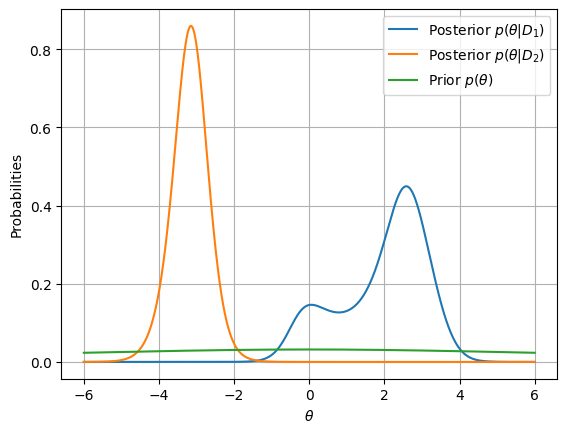

In [15]:
posterior_D1 = posterior(D1, theta_values)
posterior_D2 = posterior(D2, theta_values)

plt.plot(theta_values, posterior_D1, label=r'Posterior $p(\theta|D_1)$')
plt.plot(theta_values, posterior_D2, label=r'Posterior $p(\theta|D_2)$')
plt.plot(theta_values, prior(theta_values), label=r'Prior $p(\theta)$')
plt.xlabel(r'$\theta$')
plt.ylabel("Probabilities")
plt.legend()
plt.grid()
plt.show()

### Observations

We can clearly see that the prior pdf $p(\theta)$ is spread out compared to the posterior distributions. This is due to the fact that it is less informed and shows no preference to a specific $\theta$ value.

Comparatevly, the posterior distributions show clear peaks (at 2.5 for $D_1$ and -3.2 for $D_2$), which means that our sample data $D_1$ and $D_2$ influence our decision on selecting the optimal $\theta$ values.

## B2

We will now implement the predict function which is given as: $$ h(x) = \log P(x | D_1) - \log P(x | D_2) + \log P(\omega_1) - \log P(\omega_2) $$

where $P(x|D)$ is calculated by the integral:

$$ P(x|D) = \int p(x|\theta) p(\theta|D) \, d\theta $$

In [16]:
def p_x_given_D (x, D, theta_values):
    pdf_values = pdf(x, theta_values)
    posterior_values = posterior(D, theta_values)
    integral = [pdf(x, theta) * posterior_values[i] for i, theta in enumerate(theta_values)]
    return np.trapezoid(integral, theta_values)

def predict (x, apriori_P1, apriori_P2, theta_values):
    p_x_given_D1 = p_x_given_D(x, D1, theta_values)
    p_x_given_D2 = p_x_given_D(x, D2, theta_values)
    return np.log(p_x_given_D1) - np.log(p_x_given_D2) + np.log(apriori_P1) - np.log(apriori_P2)

### Plotting $h(x)$

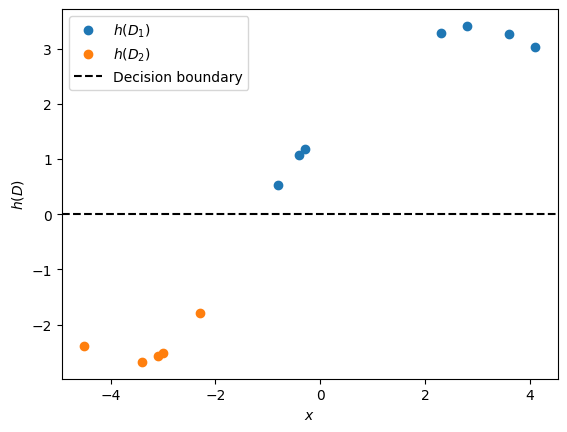

In [17]:
h_D1_values = [predict(x, apriori_P1, apriori_P2, theta_values) for x in D1]
h_D2_values = [predict(x, apriori_P1, apriori_P2, theta_values) for x in D2]

plt.plot(D1, h_D1_values, 'o', label=r'$h(D_1)$')
plt.plot(D2, h_D2_values, 'o', label=r'$h(D_2)$')
plt.axhline(0, color='black', linestyle='--', label='Decision boundary')
plt.xlabel(r'$x$')
plt.ylabel(r'$h(D)$')
plt.legend()
plt.show()


### Observations and conclusions

- The discriminant function now classifies all of the points correctly (compared to part A), since for each point in the dataset $D_1$ we have $h(x) > 0$ and for the points in dataset $D_2$ we have $h(x) < 0$

- The Bayesian Estimation seems like the better approach since it incorporates the prior knowledge about the parameter $\theta$ through the prior distribution $p(\theta)$, leading to better parameter estimations. In contrast, the MLE only relies on our dataset and tries to maximize the likelihood $p(D|\theta)$, without taking into account any information about the prior distribution of our parameter $\theta$.

- Also, the BE accounts for all possible values of $\theta$ compared to MLE that estimates a single point $\hat{\theta}$ that maximizes the likelihood.

- It's important to note that the BE is a lot more computationally complex and expensive compared to MLE, so even though BE leads to better results, it might not be worth implementing in practice (especially for bigger multi-dimensional problems).

All in all, the Bayesian approach is preferred in our current problem since it achieves a 100% accuracy compared to MLE that misclassified 1 point.  







# PART C

## C1

We will once again install the necessary library sklearn (scikit-learn) and import it 

In [18]:
%pip install scikit-learn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Note: you may need to restart the kernel to use updated packages.


Load only the first 2 features from the Iris dataset

In [19]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

Split the dataset equally into training and testing parts

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Now we will iterate over the depth values $[1, 15]$ in order to find optimal depth that provides the best accuracy. The depth and accuracy values are saved in an array to plot them later on.

For each depth, we create a new DecisionTreeClassifier and we fit the training data. Then, the model predicts the labels for the test dataset and calculates the accuracy using the accuracy_score function. If the accuracy is higher than the previous best accuracy, we update best_accuracy and best_depth with the new values.

In [21]:
depth_accuracy_values = []

best_accuracy = 0
best_depth = 0
for depth in range(1, 16):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    depth_accuracy_values.append((depth, acc))
    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = depth

print(f"Best Accuracy for Decision Tree: {best_accuracy} at depth {best_depth}")

Best Accuracy for Decision Tree: 0.7866666666666666 at depth 3


Now we're going to plot the accuracy for each depth value. We can clearly see that the highest accuracy is for $depth = 3$ with a value of $0.7866$. The accuracy has a significant drop at $depth = 7$, indicating that there's **overfitting** and the model fails to generalize. Thus, it is unable to perform well on unseen data. In our case the training set is relatively small (150 samples) so large depth values are not suitable. Keeping the depth to low values between $2-5$ is great option if we want to avoid both overfitting and underfitting.

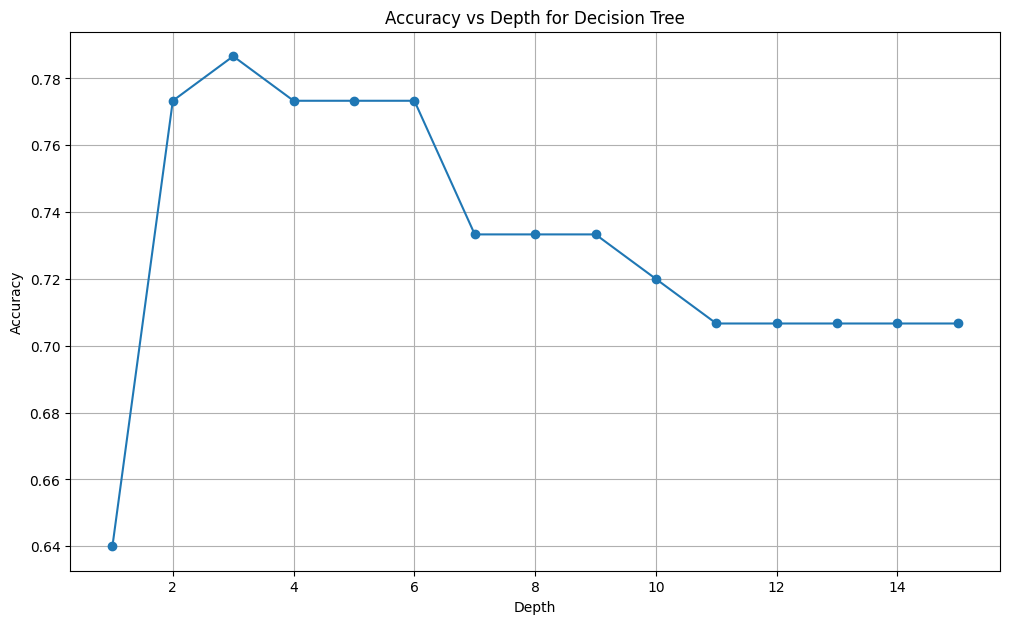

In [22]:
depth_values, accuracy_values = zip(*depth_accuracy_values)

plt.figure(figsize=(12, 7))
plt.plot(depth_values, accuracy_values, marker='o')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth for Decision Tree')
plt.grid(True)
plt.show()

Displaying the decision boundaries for our best depth $(=3)$ and the points from both the training and test sets, we can see that the model is neither overfitting or underfitting.

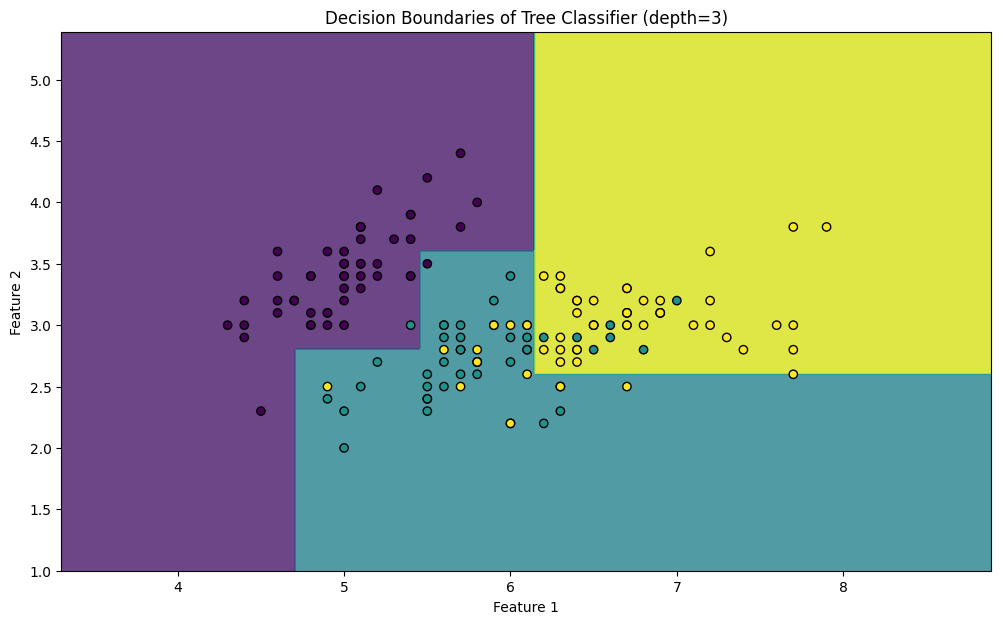

In [23]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Train a Decision Tree classifier with the best depth
clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf.fit(X_train, y_train)
z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(12, 7))
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Decision Boundaries of Tree Classifier (depth=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## C2

Just like before, we're going to iterate over the depth values $[1, 15]$ and for each one create a random forest with γ=0.5. Our aim is to find the depth with the highest accuracy.

This time we're using RandomForestClassifier with bootstrap enabled, that creates 100 trees using 50% of the training points.

In [24]:
depth_accuracy_rf_values = []

best_accuracy_rf = 0
best_depth_rf = 0
for depth in range(1, 16):
    clf_rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42, bootstrap=True, max_samples=0.5)
    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_test)
    acc_rf = accuracy_score(y_test, y_pred_rf)
    depth_accuracy_rf_values.append((depth, acc_rf))
    if acc_rf > best_accuracy_rf:
        best_accuracy_rf = acc_rf
        best_depth_rf = depth

print(f"Best Accuracy for Random Forest: {best_accuracy_rf} at depth {best_depth_rf}")

Best Accuracy for Random Forest: 0.8266666666666667 at depth 2


The highest accuracy achieved with the Random Forest Classifier is $0.8266$ with $depth=2$. From the plot below we can see for higher depth values the accuracy drops since we're overfitting. For $depth=1$ we have underfitting since the depth is too small.

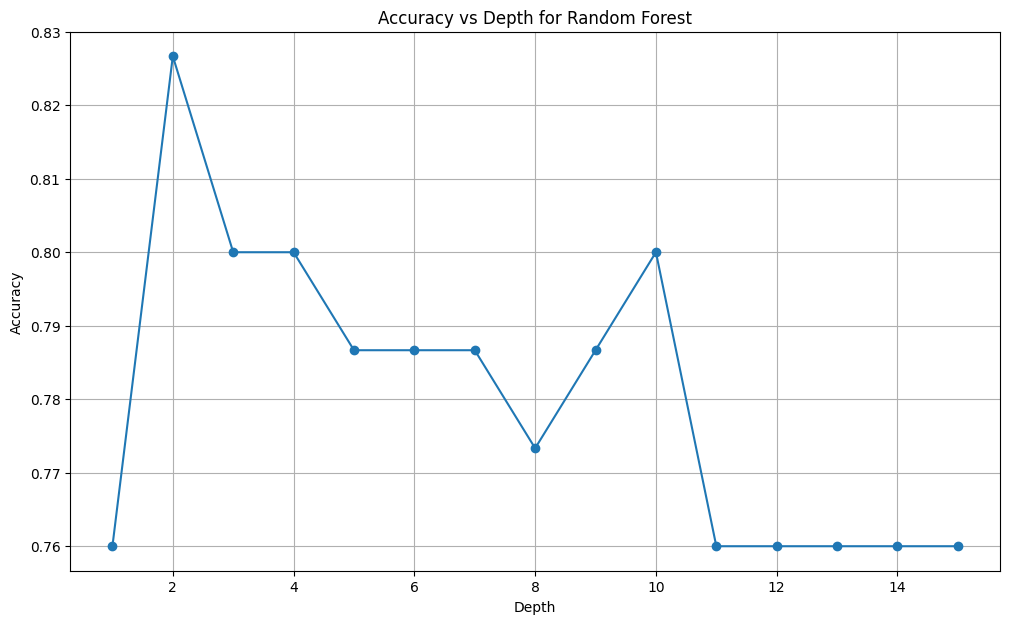

In [25]:
depth_values_rf, accuracy_values_rf = zip(*depth_accuracy_rf_values)

plt.figure(figsize=(12, 7))
plt.plot(depth_values_rf, accuracy_values_rf, marker='o')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth for Random Forest')
plt.grid(True)
plt.show()

Below we're displaying the decision boundaries for the best depth $(=2)$

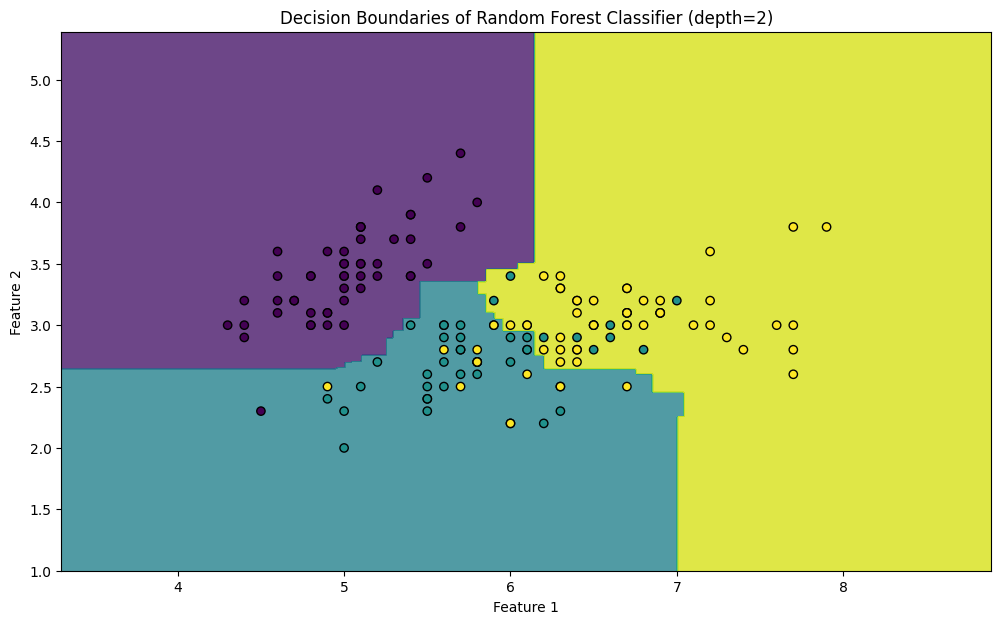

In [26]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=best_depth_rf, random_state=42, bootstrap=True, max_samples=0.5)
clf_rf.fit(X_train, y_train)
z_rf = clf_rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(12, 7))
plt.contourf(xx, yy, z_rf, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Decision Boundaries of Random Forest Classifier (depth=2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Observations and Conclusions

Comparing the 2 decision boundaries we can conclude that the random forest classifier with γ = 0.5 achieves **higher accuracy** than the single decision tree classifier. The decision tree produces more rectangular boundaries while the random forest, by combining multiple trees, generates **smoother and more flexible boundaries**, better capturing complex patterns in the data.
Using γ=0.5 ensures a balance between diversity and accuracy by training each tree on 50% of the data. This configuration avoids overfitting while maintaining a sufficient amount of information for accurate predictions.

Lastly, we're going to test the effect of $\gamma$ for a specific depth value (e.g. 3) by printing the accuracy for various $\gamma$.

Gamma: 0.1, Accuracy: 0.8
Gamma: 0.2, Accuracy: 0.8
Gamma: 0.3, Accuracy: 0.8133333333333334
Gamma: 0.4, Accuracy: 0.8266666666666667
Gamma: 0.5, Accuracy: 0.8266666666666667
Gamma: 0.6, Accuracy: 0.8266666666666667
Gamma: 0.7, Accuracy: 0.8266666666666667
Gamma: 0.8, Accuracy: 0.8266666666666667
Gamma: 0.9, Accuracy: 0.8266666666666667


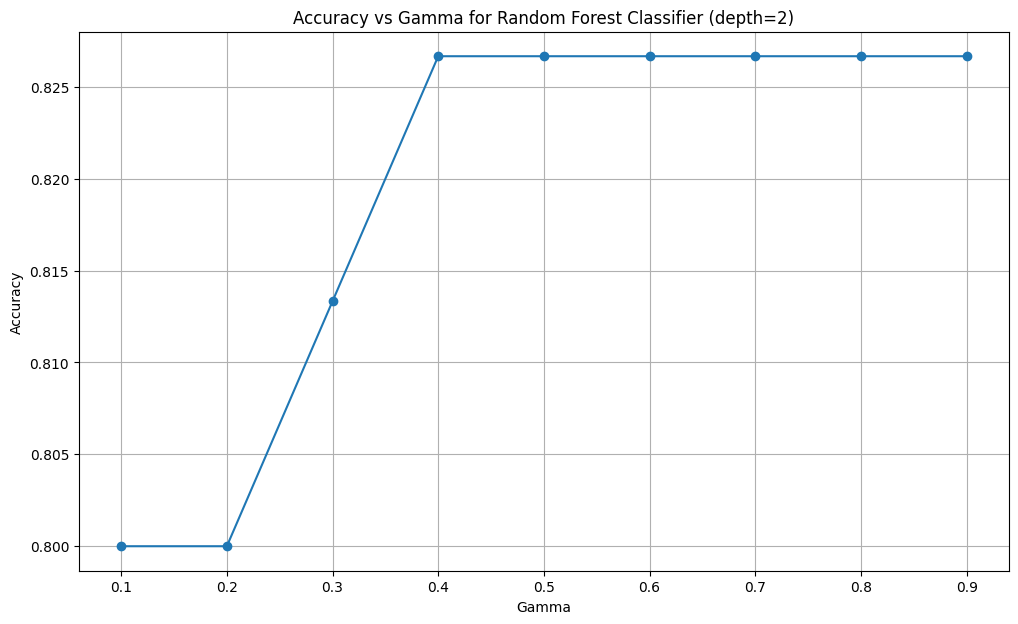

In [29]:
gamma_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracy_values = []

for gamma in gamma_values:
    rf_gamma = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42, bootstrap=True, max_samples=gamma)
    rf_gamma.fit(X_train, y_train)
    y_pred_gamma = rf_gamma.predict(X_test)
    acc_gamma = accuracy_score(y_test, y_pred_gamma)
    accuracy_values.append(acc_gamma)
    print(f"Gamma: {gamma}, Accuracy: {acc_gamma}")

plt.figure(figsize=(12, 7))
plt.plot(gamma_values, accuracy_values, marker='o')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Gamma for Random Forest Classifier (depth=2)')
plt.grid(True)
plt.show()

### Effect of $\gamma$ on Algorithm Performance

In the Random Forest algorithm, the parameter γ represents the proportion of the training dataset used for each bootstrap sample.
It directly influences the diversity and robustness of the model.

Our expected performance based on the $\gamma$ value is the following:

**Small γ** (e.g., 20%)
- Pros:
High diversity among trees due to smaller sample sizes.
Reduces overfitting, especially for noisy datasets.
- Cons:
May lead to underfitting since individual trees are trained on limited data.

**Medium γ** (e.g., 50%)
- Pros:
Balanced approach between diversity and training data size.
Provides sufficient information for each tree to learn patterns while retaining diversity.
- Cons:
Might not capture highly complex patterns if data is too sparse.

**Large γ** (e.g., 80%)
- Pros:
Higher accuracy in training, as each tree learns from a larger dataset.
Suitable for large, clean datasets with low noise.
- Cons:
Reduces diversity, leading to overfitting.
Poor generalization to unseen data.

In our case the accuracy fluctuates between $0.8$ and $0.8266$, reaching it's peak at $\gamma = 40\%$. The accuracy stays constant after that, indicating no real preference for a specific $\gamma$ value. This could be because the dataset is relatively small and the model is not very complex.

A typical default value of γ = 0.5 often balances accuracy and generalization and leads to good results.